# Hydrology Exercise

The total water flow (surface and subsurface) from a land grid cell is an important hydrological climate change variable related to e.g. drought and river discharge. Consequentially, it amongst others, relates to e.g. agriculture and hydropower production capacity.

IPCC AR6 states that 'Runoff will increase in the high northern latitudes and decrease in the Mediterranean and southern Africa (high confidence).' and '(The) total land area (is) subject to increasing drought frequency and severity would expand (high confidence), and in the Mediterranean, southwestern South America and western North America, future aridification will far exceed the magnitude of change seen in the last millennium (high confidence).' 

You can read further details here: <br>
[AR6 WG1 Chapter 8](https://www.ipcc.ch/report/ar6/wg1/chapter/chapter-8/) <br>
[AR6 WG2 Chapter 4](https://www.ipcc.ch/report/ar6/wg2/chapter/chapter-4/)

In this exercise, you will explore the change in runoff in NorESM2-MM between
- the two historical periods 1950-1980 and 1980-2010
- the historical period 1950-1980 and the future period 2050-2080 in SSP585

In [15]:
# Import python packages
import xarray as xr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf
from glob import glob

%matplotlib inline

# constants
secday = 60*60*24

## Projected changes in the annual mean run-off in selected river basins
(Edited from Figure 4.16 in Caretta et al., 2022: Water. In: Climate Change 2022: Impacts, Adaptation, and Vulnerability.)

In [16]:
from IPython.display import Image
Image(url='https://www.ipcc.ch/report/ar6/wg2/downloads/figures/IPCC_AR6_WGII_Figure_4_016.png', width=1000)

# Read in the CMIP6 data

**Task: Read in the daily runoff data of NorESM2-MM for each the three periods (choose ensemble member r1i1p1f1). Combine the files of each period by coordinates.**<br>

<details>
<summary>Hint</summary>
    
NorESM-MM data are located here: /mnt/tacco-ns1004k-cmroot/NorESM2-MM/

You can use `list` function and `glob` function to get a list of files using wildcards (`*` is the wildcard here), and `sort()` method to sort them in ascending alphabetical order:

```python
    path = "/mnt/tacco-ns1004k-cmroot/NorESM2-MM/"
    file_list_historical=list(glob(path+"historical/*/*mrro_day*r1i1p1f1*"))
    file_list_historical.sort()
```

file_list_historical is a sorted list 

You can inspect it and you can index it, e.g. `file_list_historical[0:-1]`

Open multifile dataset with `xr.open_mfdataset()` 

Use `combine = 'by_coords'` as and argument for `xr.open_mfdataset()` to merge multiple files into one by combining them according to their coordinate.

</details>

**Task: Calculate the mean annual runoff [mm/yr] of each of the periods.**<br>

<details>
<summary>Hint</summary>
    
You can apply the xarray functions `.groupby()` , `.sum()` and `.mean()` to your xarray. For these functions, you need to specify along which dimension of the xarray you want to apply them. 

Watch out for the units!

You can also update the attributes of your xarray, which then makes plotting more handy: `.attrs.update({"units" : "mm/yr"})`.
</details>

# Visualize runoff in Europe

**Task: Plot the mean annual runoff [mm/yr] of all three periods over Europe (longitude 12.5$\degree$E - 42.4$\degree$W, latitude 30$\degree$N - 80$\degree$N).**<br>

<details>
<summary>Hint</summary>
    
Use `ax.set_extent()`, plot coastlines and borders.

To only show gridcells that represent land surface you can also think of applying a landmask to your data. If you want to do that, use the same dataset as we used in the permafrost exercise (landfraction):

```python
    files=list(glob(path+"historical/*/*sftlf*r1i1p1f1*"))
    sftlf = xr.open_mfdataset(files)
```

</details>

# Change in Mean Annual Runoff between the Periods

**Tasks:**<br>

**Calculate and display the change in mean annual runoff between the two historical periods and 1950-1980 vs. 2050-2080 (SSP585).**<br>

**How has the mean annual runoff changed between the historical periods? How will it, according to NorESM2-MM change between 1950-1980 vs. 2050-2080 (SSP585)?**<br>

**How does this fit to the figure by Caretta et al. (2022) presented in AR6 WG2 Chapter 4? What are possible explanations?**

Text(0.5, 1.0, 'Average annual runoff difference 2050-2080 SSP585 - 1950-1980 ')

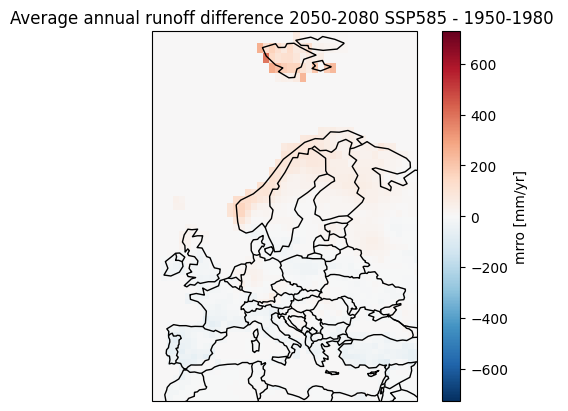

In [27]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.Miller())

lon_min = -12.5
lon_max = 42.5
lat_min = 30
lat_max = 80

ax.set_extent([lon_min, lon_max, lat_min, lat_max])
myplot= diff.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.set_title('Average annual runoff difference 2050-2080 SSP585 - 1950-1980 ')

# Bonus: Explore more scenarios, models or different regions.